In [62]:
import numpy as np
import os
import matplotlib.pyplot as plt

d = np.load('10_100_1000_sgd_sgd.npy', allow_pickle=True)
data_sgd = d[0]
accuracies_sgd = d[1]

d = np.load('10_100_1000_sgd_sgd_only.npy', allow_pickle=True)
data_sgd_only = d[0]
accuracies_sgd_only = d[1]

In [63]:
bf_loss_sgd = [np.mean(total['bf_loss']) for update, total in data_sgd.items()]
dg_loss_sgd = [np.mean(total['dg_loss']) for update, total in data_sgd.items()]
ds_loss_sgd = [np.mean(total['ds_loss']) for update, total in data_sgd.items()]

bf_loss_sgd_only = [np.mean(total['bf_loss']) for update, total in data_sgd_only.items()]
dg_loss_sgd_only = [np.mean(total['dg_loss']) for update, total in data_sgd_only.items()]
ds_loss_sgd_only = [np.mean(total['ds_loss']) for update, total in data_sgd_only.items()]

bf_ratio_sgd = [np.mean(total['bf_ratio']) for update, total in data_sgd.items()]
dg_ratio_sgd = [np.mean(total['dg_ratio']) for update, total in data_sgd.items()]
ds_ratio_sgd = [np.mean(total['ds_ratio']) for update, total in data_sgd.items()]

bf_ratio_sgd_only = [np.mean(total['bf_ratio']) for update, total in data_sgd_only.items()]
dg_ratio_sgd_only = [np.mean(total['dg_ratio']) for update, total in data_sgd_only.items()]
ds_ratio_sgd_only = [np.mean(total['ds_ratio']) for update, total in data_sgd_only.items()]

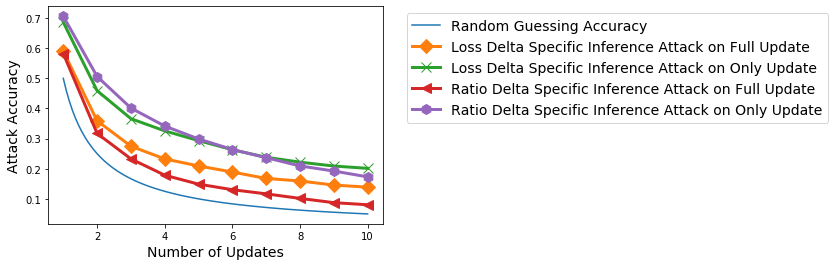

In [47]:
ds = list(range(1,11))

x = np.linspace(1, 10, 100)
y = [0.5 * (1 / x) if x != 0 else 100 for x in x]
plt.plot(x, y, label='Random Guessing Accuracy')
plt.plot(ds, ds_loss_sgd, 
         'D', label='Loss Delta Specific Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, ds_loss_sgd_only, 
         'x', label='Loss Delta Specific Inference Attack on Only Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, ds_ratio_sgd, 
         '<', label='Ratio Delta Specific Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, ds_ratio_sgd_only, 
         'h', label='Ratio Delta Specific Inference Attack on Only Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

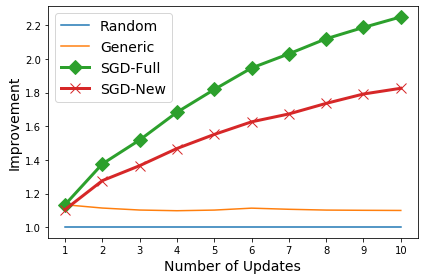

In [64]:
ds = list(range(1,11))

x = np.linspace(1, 10, 100)
y = [1 for x in x]
plt.plot(x, y, label='Random')
plt.plot(ds, [2 * x for x in dg_loss_sgd], label='Generic')
plt.plot(ds, [(i + 1) * x * 2for i, x in enumerate(ds_loss_sgd)], 
         'D', label='SGD-Full', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [(i + 1) * x * 2 for i, x in enumerate(ds_loss_sgd_only)], 
         'x', label='SGD-New', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Improvement', fontsize=14) 
plt.xticks(np.arange(1, 11))
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_mu_specific_100.png')
plt.show()

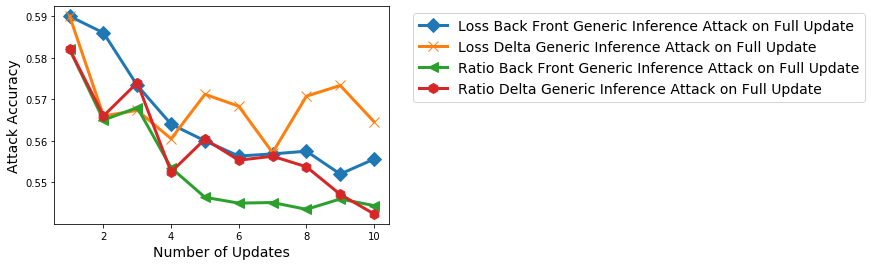

In [49]:
ds = list(range(1,11))

plt.plot(ds, bf_loss_sgd, 
         'D', label='Loss Back Front Generic Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd, 
         'x', label='Loss Delta Generic Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, bf_ratio_sgd, 
         '<', label='Ratio Back Front Generic Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_ratio_sgd, 
         'h', label='Ratio Delta Generic Inference Attack on Full Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

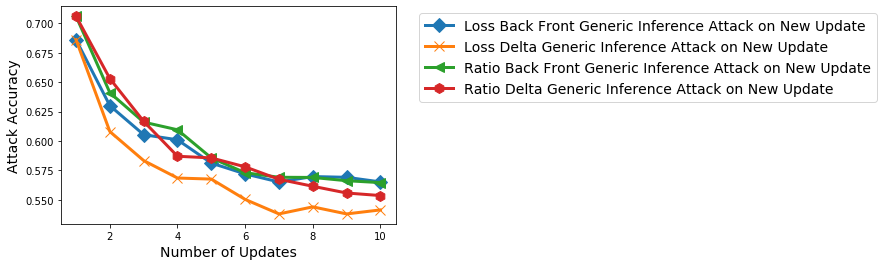

In [50]:
plt.plot(ds, bf_loss_sgd_only, 
         'D', label='Loss Back Front Generic Inference Attack on New Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd_only, 
         'x', label='Loss Delta Generic Inference Attack on New Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, bf_ratio_sgd_only, 
         '<', label='Ratio Back Front Generic Inference Attack on New Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_ratio_sgd_only, 
         'h', label='Ratio Delta Generic Inference Attack on New Update', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()

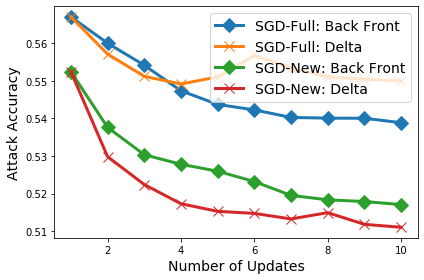

In [65]:
plt.plot(ds, bf_loss_sgd, 
         'D', label='SGD-Full: Back Front', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd, 
         'x', label='SGD-Full: Delta', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, bf_loss_sgd_only, 
         'D', label='SGD-New: Back Front', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd_only, 
         'x', label='SGD-New: Delta', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('fmnist_mu_generic_100.png')
plt.show()

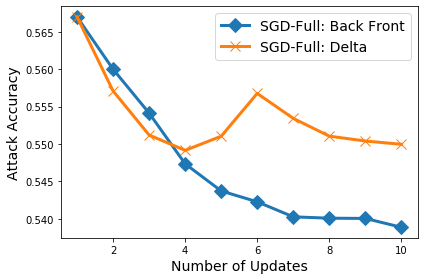

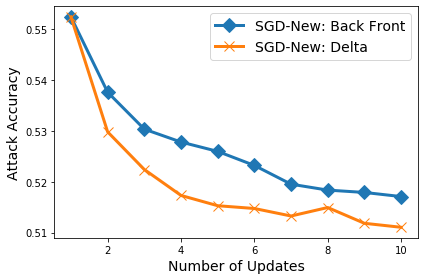

In [66]:
plt.plot(ds, bf_loss_sgd, 
         'D', label='SGD-Full: Back Front', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd, 
         'x', label='SGD-Full: Delta', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
ax = plt.gca()
plt.savefig('fmnist_sgd_full_generic_100.png')
plt.show()

plt.plot(ds, bf_loss_sgd_only, 
         'D', label='SGD-New: Back Front', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, dg_loss_sgd_only, 
         'x', label='SGD-New: Delta', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Number of Updates', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
ax = plt.gca()
plt.savefig('fmnist_sgd_only_generic_100.png')
plt.show()

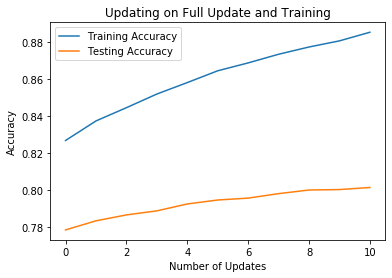

In [53]:
training = [np.mean(d['training']) for update, d in accuracies_sgd.items()]
testing = [np.mean(d['testing']) for update, d in accuracies_sgd.items()]

x = np.arange(len(training))

plt.plot(x, training, label='Training Accuracy')
plt.plot(x, testing, label='Testing Accuracy')
plt.title('Updating on Full Update and Training')
plt.ylabel('Accuracy')
plt.xlabel('Number of Updates')
plt.legend()
plt.show()

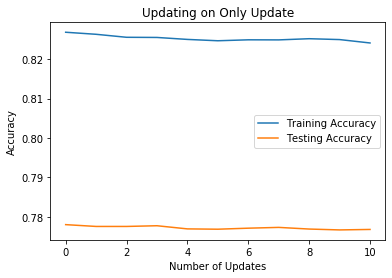

In [54]:
training = [np.mean(d['training']) for update, d in accuracies_sgd_only.items()]
testing = [np.mean(d['testing']) for update, d in accuracies_sgd_only.items()]

x = np.arange(len(training))

plt.plot(x, training, label='Training Accuracy')
plt.plot(x, testing, label='Testing Accuracy')
plt.title('Updating on Only Update')
plt.ylabel('Accuracy')
plt.xlabel('Number of Updates')
plt.legend()
plt.show()